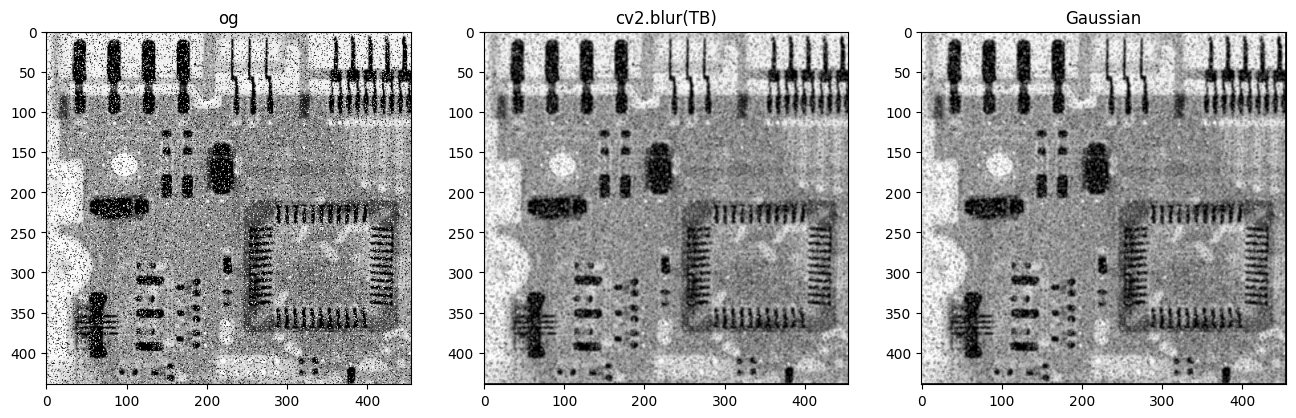

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

class lowpass_filter():
    '''Lớp xử lý lọc mịn ảnh'''
    def __init__(self,image) -> None:
        '''Khởi tạo đối
          tượng ảnh đầu vào'''
        self.img=image
    def convolution2d(self,kernel):
        #padding
        m, n = self.img.shape
        img_new = np.zeros([m, n], dtype="uint8")
        for i in range(1, m-1):
            for j in range(1, n-1):
                temp = self . img [i-1, j-1]        * kernel [0, 0]\
                        + self.img [i-1, j]       * kernel [0, 1]\
                        + self.img [i-1, j + 1]   * kernel [0, 2]\
                        + self.img [i, j-1]       * kernel [1, 0]\
                        + self.img [i, j]         * kernel [1, 1]\
                        + self.img [i, j + 1]     * kernel [1, 2]\
                        + self.img [i + 1, j-1]   * kernel [2, 0]\
                        + self.img [i + 1, j]     * kernel [2, 1]\
                        + self.img [i + 1, j+1]   * kernel [2, 2]
                img_new [i, j]= temp
        img_new = img_new.astype (np.uint8)
        return img_new
    def MeanFilter3_3(self):
        '''Phương thức lọc trung bình'''
        MeanKernel33=np.array([[1/9, 1/9, 1/9],
                                    [1/9, 1/9, 1/9],
                                    [1/9, 1/9, 1/9]], dtype="float")
        return self.convolution2d(MeanKernel33)
    def GaussianFilter3_3(self):
        '''phuong thuc loc gaussian'''
        GaussainKernel33=np.array([[0.3679/4.8976, 0.6065/4.8976, 0.3679/4.8976],
                                        [0.6065/4.8976, 1.0/4.8976, 0.6065/4.8976],
                                        [0.3679/4.8976, 0.6065/4.8976, 0.3679/4.8976]],
                                       dtype="float")
        return self.convolution2d(GaussainKernel33)
    

if __name__=='__main__':
    #doc va hien thi anh goc
    image = cv2.imread('D:/test2.tif',0)
    fig= plt.figure(figsize=(9,9))
    ax=fig.subplots(2,2)
    ax[0,0].imshow(image,cmap="gray")
    ax1[0,0].set_title("og")
    #khỏi tạo đối tượng
    filter_object=lowpass_filter(image)
    smooth_img=filter_object.MeanFilter3_3()
    #smooth_img= cv2.blur(image, (10,10))
    #smooth_img= cv2.boxFilter(image, -1, (10,10), normalize=True)
    ax[0,1].imshow(smooth_img,cmap="gray")
    ax[0,1].set_title("cv2.blur(TB)")
    #gausian
    smooth_imgG=filter_object.MeanFilter3_3()
    ax[1,0].imshow(smooth_img,cmap="gray")
    ax[1,0].set_title("Gaussian")
    #median
    smooth_imgM=filter_object.Media33()
    ax[1,1].imshow(smooth_img,cmap="gray")
    ax[1,1].set_title("Medioan")
    plt.show() 